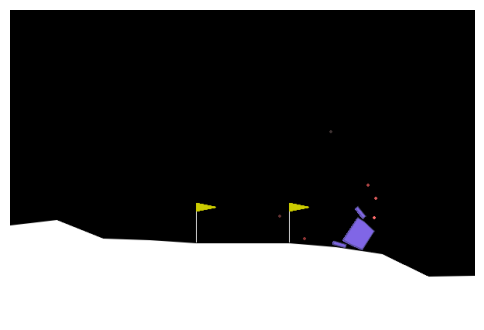

In [11]:
import gymnasium as gym
import matplotlib.pyplot as plt
from matplotlib import animation
from IPython.display import HTML

env = gym.make("LunarLander-v3", render_mode="rgb_array")
observation, info = env.reset()

episode_over = False
frames = []
while not episode_over:
    frame = env.render()
    frames.append(frame)
    action = env.action_space.sample()  # agent policy that uses the observation and info
    observation, reward, terminated, truncated, info = env.step(action)

    episode_over = terminated or truncated

env.close()

# Create a matplotlib figure
fig = plt.figure(figsize=(6, 6))
img = plt.imshow(frames[0])
plt.axis('off')


def animate(i):
    img.set_data(frames[i])
    return [img]

# Create the animation
ani = animation.FuncAnimation(fig, animate, frames=len(frames), interval=50, blit=True)

# Display the animation in notebook
HTML(ani.to_jshtml())